# Hand recognition

In [1]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

In [16]:
#Perform morphological transformations to filter out the background noise
def clean_background(frame):
    #Convert to HSV color space
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    #Create a binary image with where white will be skin colors and rest is black
    mask = cv2.inRange(hsv_frame,np.array([3,40,53]),np.array([13,191,220]))
    
    #Kernel matrices for morphological transformation    
    kernel_square = np.ones((11,11),np.uint8)
    kernel_ellipse= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    
    #Dilation increase skin color area
    #Erosion increase skin color area
    dilation = cv2.dilate(mask,kernel_ellipse,iterations = 1)
    erosion = cv2.erode(dilation,kernel_square,iterations = 1)    
    dilation2 = cv2.dilate(erosion,kernel_ellipse,iterations = 1)    
    filtered = cv2.medianBlur(dilation2,3)
    kernel_ellipse= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(8,8))
    dilation2 = cv2.dilate(filtered,kernel_ellipse,iterations = 1)
    kernel_ellipse= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    dilation3 = cv2.dilate(filtered,kernel_ellipse,iterations = 1)
    median = cv2.medianBlur(dilation2,15)
    ret = cv2.threshold(median,127,255,0)[1]
    cv2.imshow('BGclean',ret)
    return ret


def show_image(image):
    im2 = image.copy()
    im2[:, :, 0] = image[:, :, 2]
    im2[:, :, 2] = image[:, :, 0]
    plt.figure(figsize = (10,10))
    plt.gca().set_aspect('equal', adjustable='box')
    plt.imshow(im2)

x 309 y 170 h 550 w 676
Execution time in seconds: 0.13890790939331055


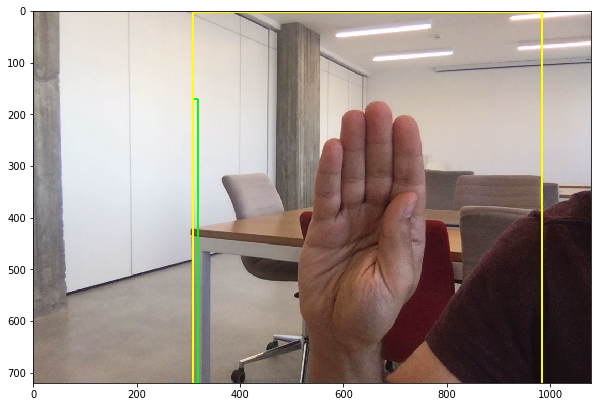

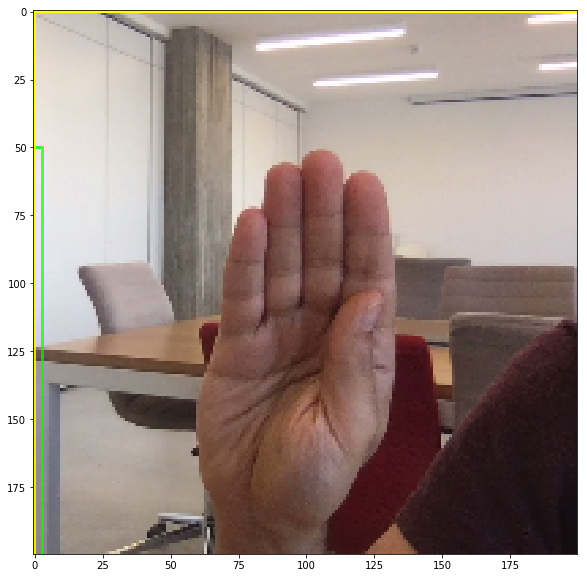

In [23]:
start_time = time.time()

img = cv2.imread('/Users/idofarhi/Documents/ITC/Projects/ASL/crop_test_images/1.jpg')

# Resize the image
#     frame = cv2.resize(frame, (0,0), fx=0.5, fy=0.5) 

threshold = clean_background(img)

#Find contours of the filtered frame
_, contours, hierarchy = cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)   

#Find Max contour area (Assume that hand is in the frame)
max_area=100
ci=0	
for i in range(len(contours)):
    cnt=contours[i]
    area = cv2.contourArea(cnt)
    if(area>max_area):
        max_area=area
        ci=i  

try:
    cnts = contours[ci]
except IndexError:
    print("No contour found")
    
#Largest area contour  
cnts = contours[ci]

#Print bounding rectangle
# x,y is top left corner
x,y,width,height = cv2.boundingRect(cnts)

frame = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

# Cropping notes:
# When cropping the image, x & y start at top left.
# y is from top to buttom of the image
# x is how much we want from left to right
# These only apply if we put Y first when indexing: crop = img[ystart:ystop, xstart:xstop]

if h > w:
    img = cv2.rectangle(frame, (x-h//4, y), (x + (h*3)//4+1, y + h), (255, 255, 0), 2)
else:
    # yellow box
#     img = cv2.rectangle(frame, (x, y-int(w*0.25)), (x + w, y + int(w*0.75)), (0, 255, 255), 2)
    img = cv2.rectangle(frame, (x,y-int(w*0.25)+1),(x+w,y + int(w+(w-h)/2.0)-1), (0, 255, 255), 2)

    crop = img[y-int(w*0.25):y + int(w*0.75), x:x+w]
print('x',x,'y',y, 'h',h,'w',w)
# Show final image
show_image(frame)



crop = cv2.resize(crop, (200, 200)) 
show_image(crop)
# Print execution time
print('Execution time in seconds:', time.time()-start_time)